<a href="https://colab.research.google.com/github/AlaaAshraf309/NTI_Task_1/blob/main/NN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving titanic_data.csv to titanic_data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
data = pd.read_csv("titanic_data.csv")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
data.shape

(889, 11)

In [5]:
data.drop(["class", "who", "adult_male", "alive"], axis=1, inplace=True)

# missing values
data['age'].fillna(data['age'].median(), inplace=True)
data['deck'].fillna("Unknown", inplace=True)

/tmp/ipython-input-4226066105.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)
/tmp/ipython-input-4226066105.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [6]:
label_enc_cols = ['sex', 'embarked', 'deck', 'embark_town', 'alone']
encoder = LabelEncoder()
for col in label_enc_cols:
    data[col] = encoder.fit_transform(data[col].astype(str))


In [7]:
X = data.drop("survived", axis=1)
y = data["survived"]


In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Binary

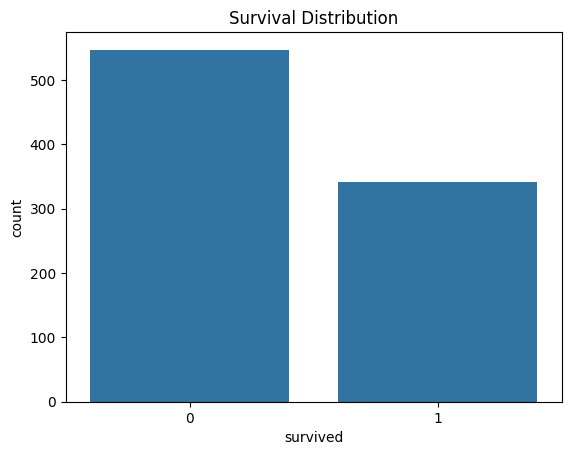

In [9]:
sns.countplot(x=y)
plt.title("Survival Distribution")
plt.show()


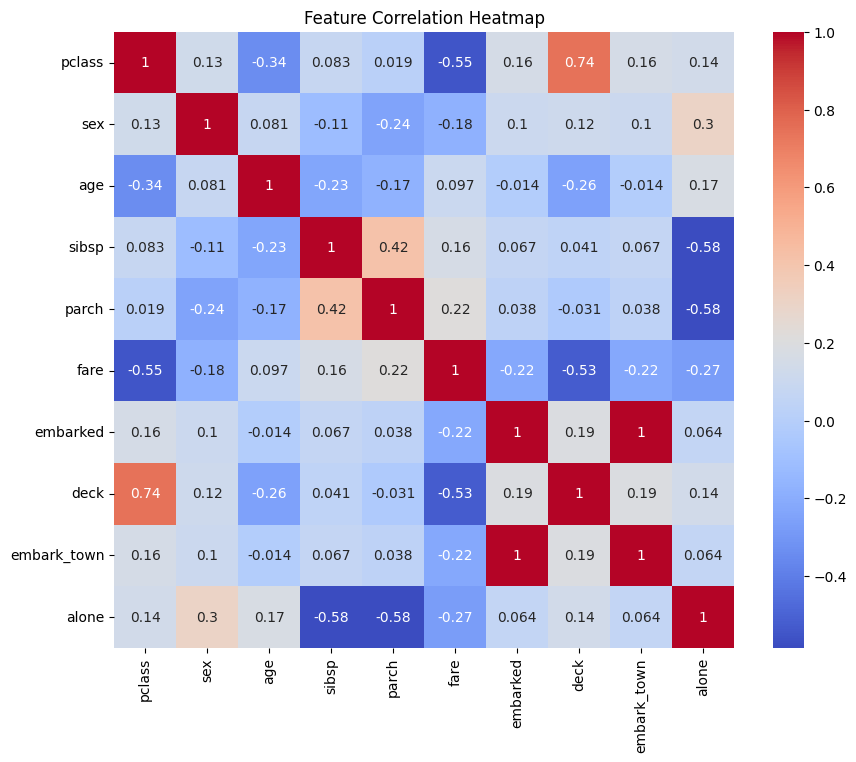

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(X, columns=data.drop("survived", axis=1).columns).corr(),
            annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [13]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, batch_size=8, verbose=1)


loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy: {acc:.2f}")


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5067 - loss: 0.7063 - val_accuracy: 0.6517 - val_loss: 0.6257
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6938 - loss: 0.5980 - val_accuracy: 0.6966 - val_loss: 0.5398
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7433 - loss: 0.5094 - val_accuracy: 0.7416 - val_loss: 0.4852
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7721 - loss: 0.4828 - val_accuracy: 0.7865 - val_loss: 0.4522
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8279 - loss: 0.4168 - val_accuracy: 0.8090 - val_loss: 0.4348
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8112 - loss: 0.4175 - val_accuracy: 0.8090 - val_loss: 0.4304
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8124 - loss: 0.4315 - val_accuracy: 0.8090 - val_loss: 0.4315
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8421 - loss: 0.3783 - val_accuracy: 0.8202 - val_loss:

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


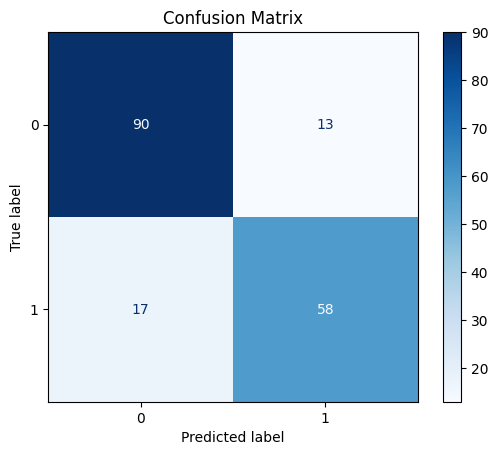

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

#Multi

In [31]:
y_multi = LabelEncoder().fit_transform(data['embarked'])
X_multi = data.drop("embarked", axis=1)

In [22]:
scaler_multi = StandardScaler()
X_multi = scaler_multi.fit_transform(X_multi)

Unique values in 'embarked': [2 0 1 3]

Value counts:
 embarked
2    643
0    168
1     76
3      2
Name: count, dtype: int64


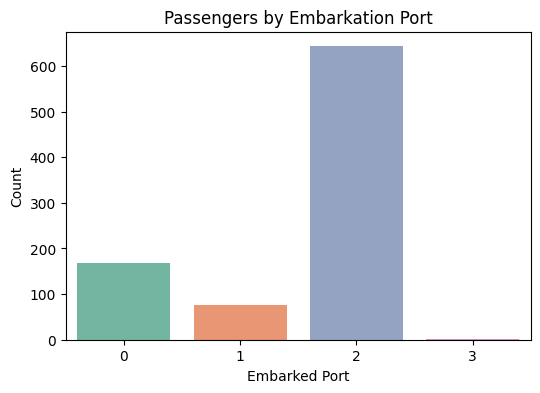

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])

print("Unique values in 'embarked':", data['embarked'].unique())
print("\nValue counts:\n", data['embarked'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='embarked', hue='embarked', data=data, palette='Set2', legend=False)
plt.title("Passengers by Embarkation Port")
plt.xlabel("Embarked Port")
plt.ylabel("Count")
plt.show()

In [23]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

In [27]:
import numpy as np
model_multi = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_multi.shape[1],)),
    Dense(8, activation='relu'),
    Dense(len(np.unique(y_multi)), activation='softmax')
])


model_multi.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
model_multi.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 348 (1.36 KB)

 Trainable params: 348 (1.36 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history_multi = model_multi.fit(
    X_train_multi, y_train_multi,
    validation_data=(X_test_multi, y_test_multi),
    epochs=50, batch_size=8, verbose=1
)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2640 - loss: 1.4424 - val_accuracy: 0.5843 - val_loss: 0.9869
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6552 - loss: 0.9081 - val_accuracy: 0.7472 - val_loss: 0.7137
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8190 - loss: 0.6097 - val_accuracy: 0.8820 - val_loss: 0.5245
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8824 - loss: 0.4538 - val_accuracy: 0.9045 - val_loss: 0.3898
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8990 - loss: 0.3333 - val_accuracy: 0.9045 - val_loss: 0.2989
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9012 - loss: 0.2720 - val_accuracy: 0.9101 - val_loss: 0.2469
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9258 - loss: 0.2079 - val_accuracy: 0.9270 - val_loss: 0.2089
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9450 - loss: 0.1733 - val_accuracy: 0.9326 - val_loss:

In [29]:
loss_multi, acc_multi = model_multi.evaluate(X_test_multi, y_test_multi)
print(f"Multi-class Accuracy (Embarked): {acc_multi:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9857 - loss: 0.0217 
Multi-class Accuracy (Embarked): 0.99


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


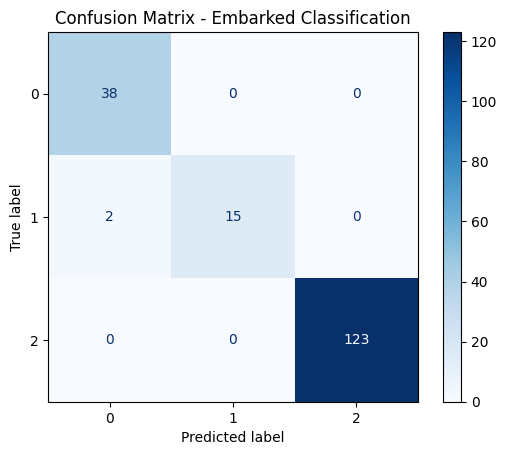

In [30]:
y_pred_multi = model_multi.predict(X_test_multi)
y_pred_classes_multi = y_pred_multi.argmax(axis=1)

cm_multi = confusion_matrix(y_test_multi, y_pred_classes_multi)
disp_multi = ConfusionMatrixDisplay(confusion_matrix=cm_multi)
disp_multi.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Embarked Classification")
plt.show()